## Prediction using Decision Tree Algorithm

#### Create the Decision Tree classifier and visualize it graphically

## Author - Sujeet Kumar Pandit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [79]:
#Importing the dataset
data = pd.read_csv(r"data/iris.csv")
print('Shape of the dataset:', data.shape)

Shape of the dataset: (150, 6)


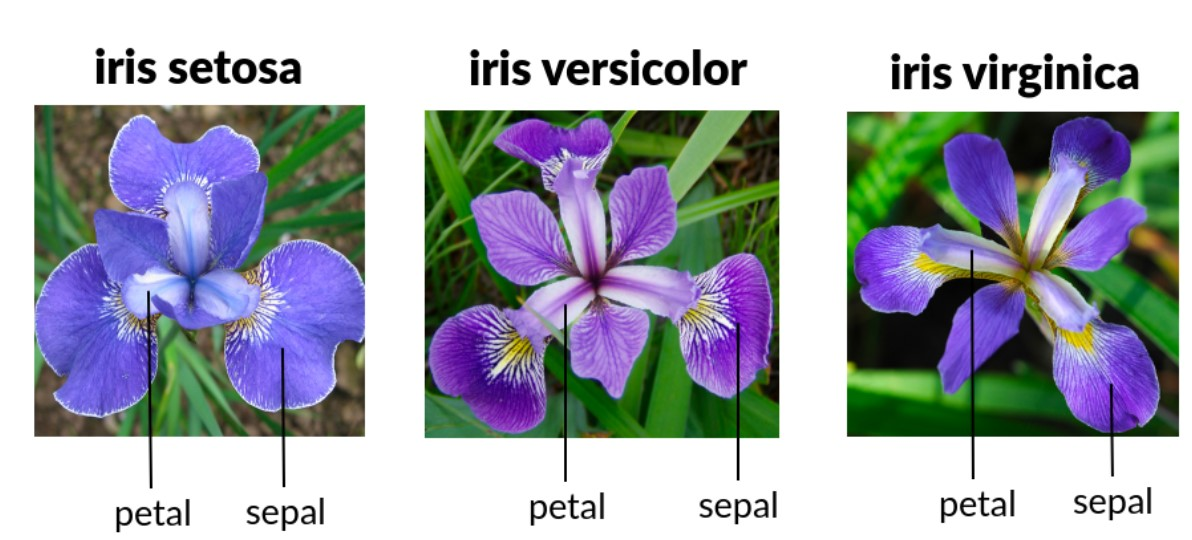

- The dataset contains **150** rows and **6** columns. 

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


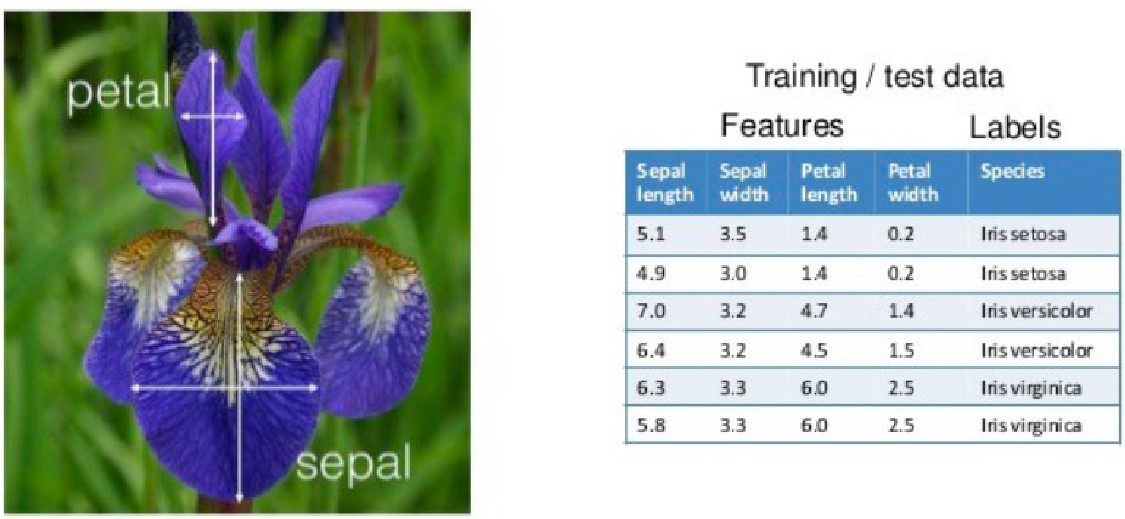

### Data Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Observation:**

- There are **no null values present** in this data set.

- **Each feature** seems to have **correct data type**.

In [80]:
data.drop(['Id'],axis = 1,inplace = True)   #drop the Id feature

In [81]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

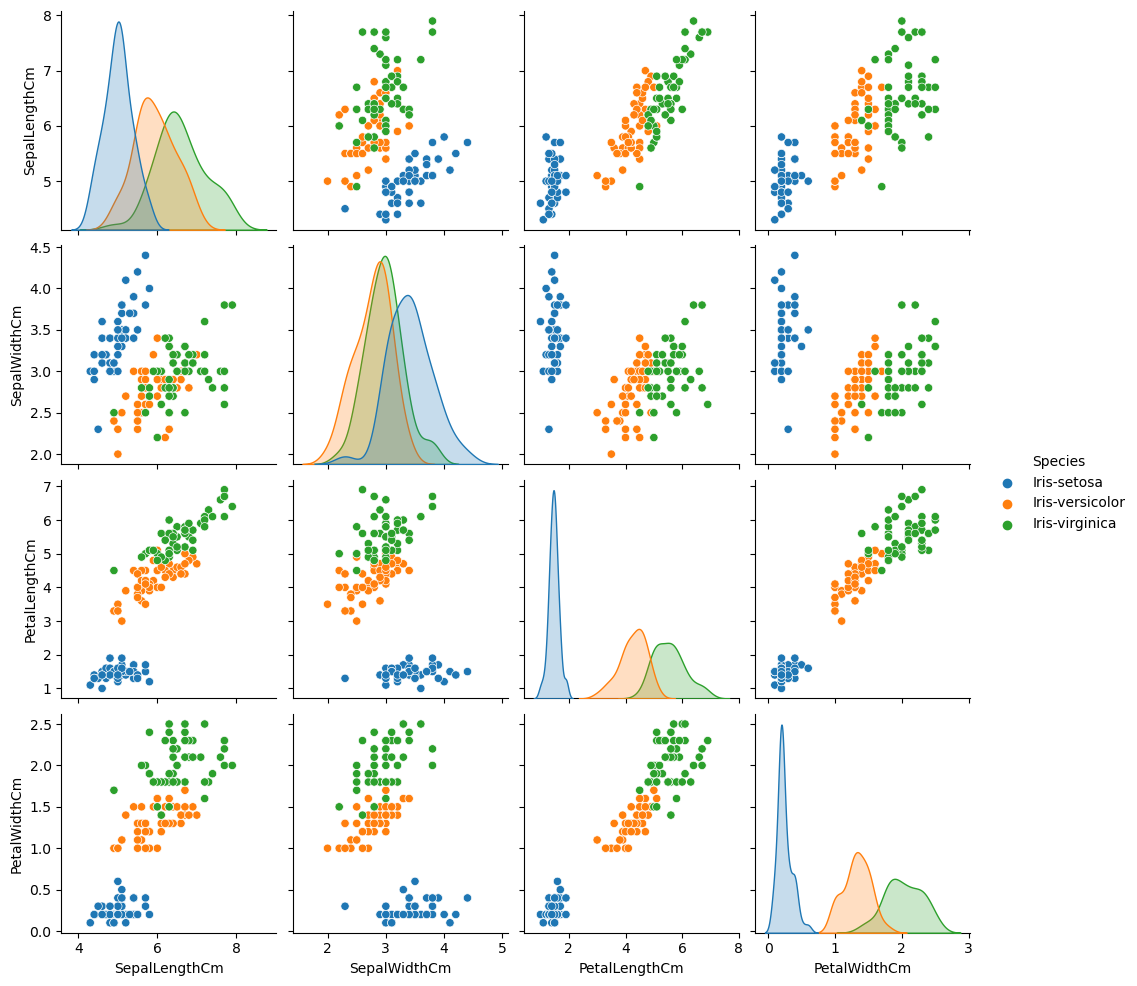

In [82]:
# Pair plot
sns.pairplot(data,hue='Species')

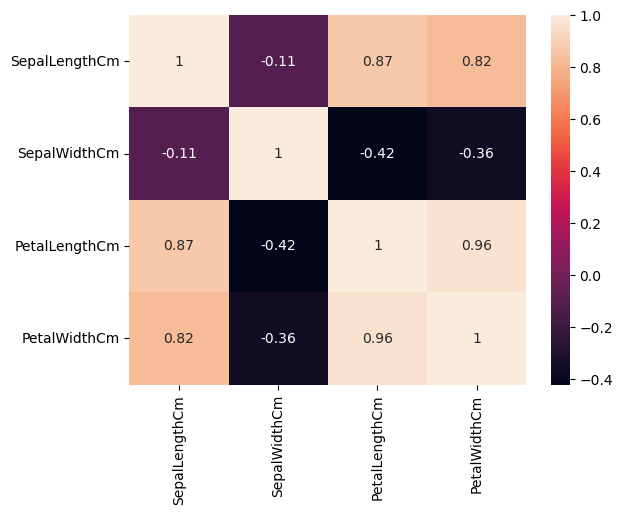

In [83]:
sns.heatmap(data.corr(), annot=True );

In [84]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Observation**
- Our Dependent feature is haivng multi class problem

#### Encoding Dependent Feature

In [85]:
#assign class value in 0,1 and 2
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,"Iris-virginica":2})

In [86]:
data.sample()   #show the random dataset details

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
52,6.9,3.1,4.9,1.5,1


In [87]:
#split dataset inot independent and dependent features
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [88]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
print(x.shape)

(150, 4)


### Now we will **split** our **data** into **training** and **testing**

In [42]:
from sklearn.model_selection import train_test_split  #import train test library
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=1)

In [76]:
print('Train cases as below')
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape:  (120, 4)
y_train shape:  (120,)

Test cases as below
x_test shape:  (30, 4)
y_test shape:  (30,)


## Model Development & Evaluation

## Decision Tree Classifier

In [92]:
# Instantiate a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [93]:
# Predicting testing labels
y_pred = dtc.predict(x_test)

In [94]:
#test the model test accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
acscore = accuracy_score(y_test,y_pred)
acscore

0.9666666666666667

### Construct a interactive Decision Tree to understand it better.

In [50]:
from sklearn.tree import plot_tree
from sklearn import tree

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

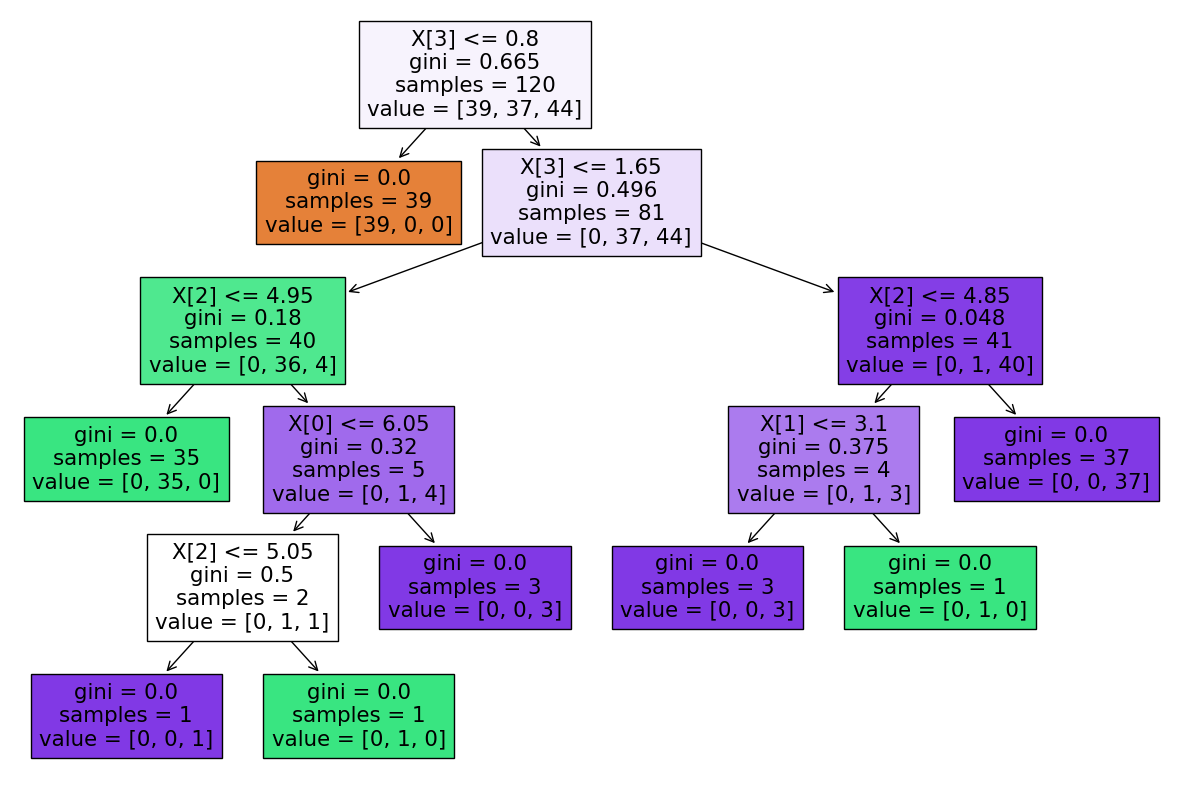

In [70]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

**You can now feed any new/test data to this DecisionTree Classifer and it would be able to predict the right class accordingly.**